In [9]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.svm import NuSVR

## Read the dataset
MSSubClass: Identifies the type of dwelling involved in the sale.

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.

       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park
       RM	Residential Medium Density

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property

       Grvl	Gravel
       Pave	Paved

Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access

LotShape: General shape of property

       Reg	Regular
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular

LandContour: Flatness of the property

       Lvl	Near Flat/Level
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression

Utilities: Type of utilities available

       AllPub	All public Utilities (E,G,W,& S)
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only

LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property

LandSlope: Slope of property

       Gtl	Gentle slope
       Mod	Moderate Slope
       Sev	Severe Slope

Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker

Condition1: Proximity to various conditions

       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street
       Norm	Normal
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

Condition2: Proximity to various conditions (if more than one is present)

       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street
       Norm	Normal
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

BldgType: Type of dwelling

       1Fam	Single-family Detached
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit

HouseStyle: Style of dwelling

       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

w: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed

RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles

Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone

MasVnrArea: Masonry veneer area in square feet

ExterQual: Evaluates the quality of the material on the exterior

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

ExterCond: Evaluates the present condition of the material on the exterior

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

Foundation: Type of foundation

       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete
       Slab	Slab
       Stone	Stone
       Wood	Wood

BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement

BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement

BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating

       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace

HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

CentralAir: Central air conditioning

       N	No
       Y	Yes

Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed

1stFlrSF: First Floor square feet

2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only

Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

GarageType: Garage location

       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage

GarageYrBlt: Year garage was built

GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished
       Unf	Unfinished
       NA	No Garage

GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

PavedDrive: Paved driveway

       Y	Paved
       P	Partial Pavement
       N	Dirt/Gravel

WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool

Fence: Fence quality

       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence

MiscFeature: Miscellaneous feature not covered in other categories

       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

MiscVal: $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

SaleType: Type of sale

       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other

SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)


In [10]:
data = pd.read_csv('House Prediction Data.csv')
data

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
2914  2915         160       RM         21.0     1936   Pave   NaN      Reg   
2915  2916         160       RM         21.0     1894   Pave   NaN      Reg   
2916  2917          20       RL        160.0    20000   Pave   NaN      Reg   
2917  2918          85       RL         62.0    10441   Pave   NaN      Reg   
2918  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
2914         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2915         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2916         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2917         Lvl    AllPub  ...        0    NaN  MnPrv        Shed     700   
2918         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal   208500.0  
1         5   2007        WD         Normal   181500.0  
2         9   2008        WD         Normal   223500.0  
3         2   2006        WD        Abnorml   140000.0  
4        12   2008        WD         Normal   250000.0  
...     ...    ...       ...            ...        ...  
2914      6   2006        WD         Normal        NaN  
2915      4   2006        WD        Abnorml        NaN  
2916      9   2006        WD        Abnorml        NaN  
2917      7   2006        WD         Normal        NaN  
2918     11   2006        WD         Normal        NaN  

[2919 rows x 81 columns]

# Data process and data analysis

## Missing value

In [11]:
from pandas.api.types import is_numeric_dtype
features_nan = [feature for feature in data.columns if data[feature].isnull().sum() > 1
                and not is_numeric_dtype(data[feature])]
for feature in features_nan:
    print(f"{feature}: {np.round(data[feature].isnull().mean(), 4)}% missing values")

MSZoning: 0.0014% missing values
Alley: 0.9322% missing values
Utilities: 0.0007% missing values
MasVnrType: 0.0082% missing values
BsmtQual: 0.0277% missing values
BsmtCond: 0.0281% missing values
BsmtExposure: 0.0281% missing values
BsmtFinType1: 0.0271% missing values
BsmtFinType2: 0.0274% missing values
Functional: 0.0007% missing values
FireplaceQu: 0.4865% missing values
GarageType: 0.0538% missing values
GarageFinish: 0.0545% missing values
GarageQual: 0.0545% missing values
GarageCond: 0.0545% missing values
PoolQC: 0.9966% missing values
Fence: 0.8044% missing values
MiscFeature: 0.964% missing values


In [12]:
from pandas.api.types import is_numeric_dtype
features_nan = [feature for feature in data.columns if data[feature].isnull().sum() > 1
                and is_numeric_dtype(data[feature])]
for feature in features_nan:
    print(f"{feature}: {np.round(data[feature].isnull().mean(), 4)}% missing values")

LotFrontage: 0.1665% missing values
MasVnrArea: 0.0079% missing values
BsmtFullBath: 0.0007% missing values
BsmtHalfBath: 0.0007% missing values
GarageYrBlt: 0.0545% missing values
SalePrice: 0.4998% missing values


## Heat map

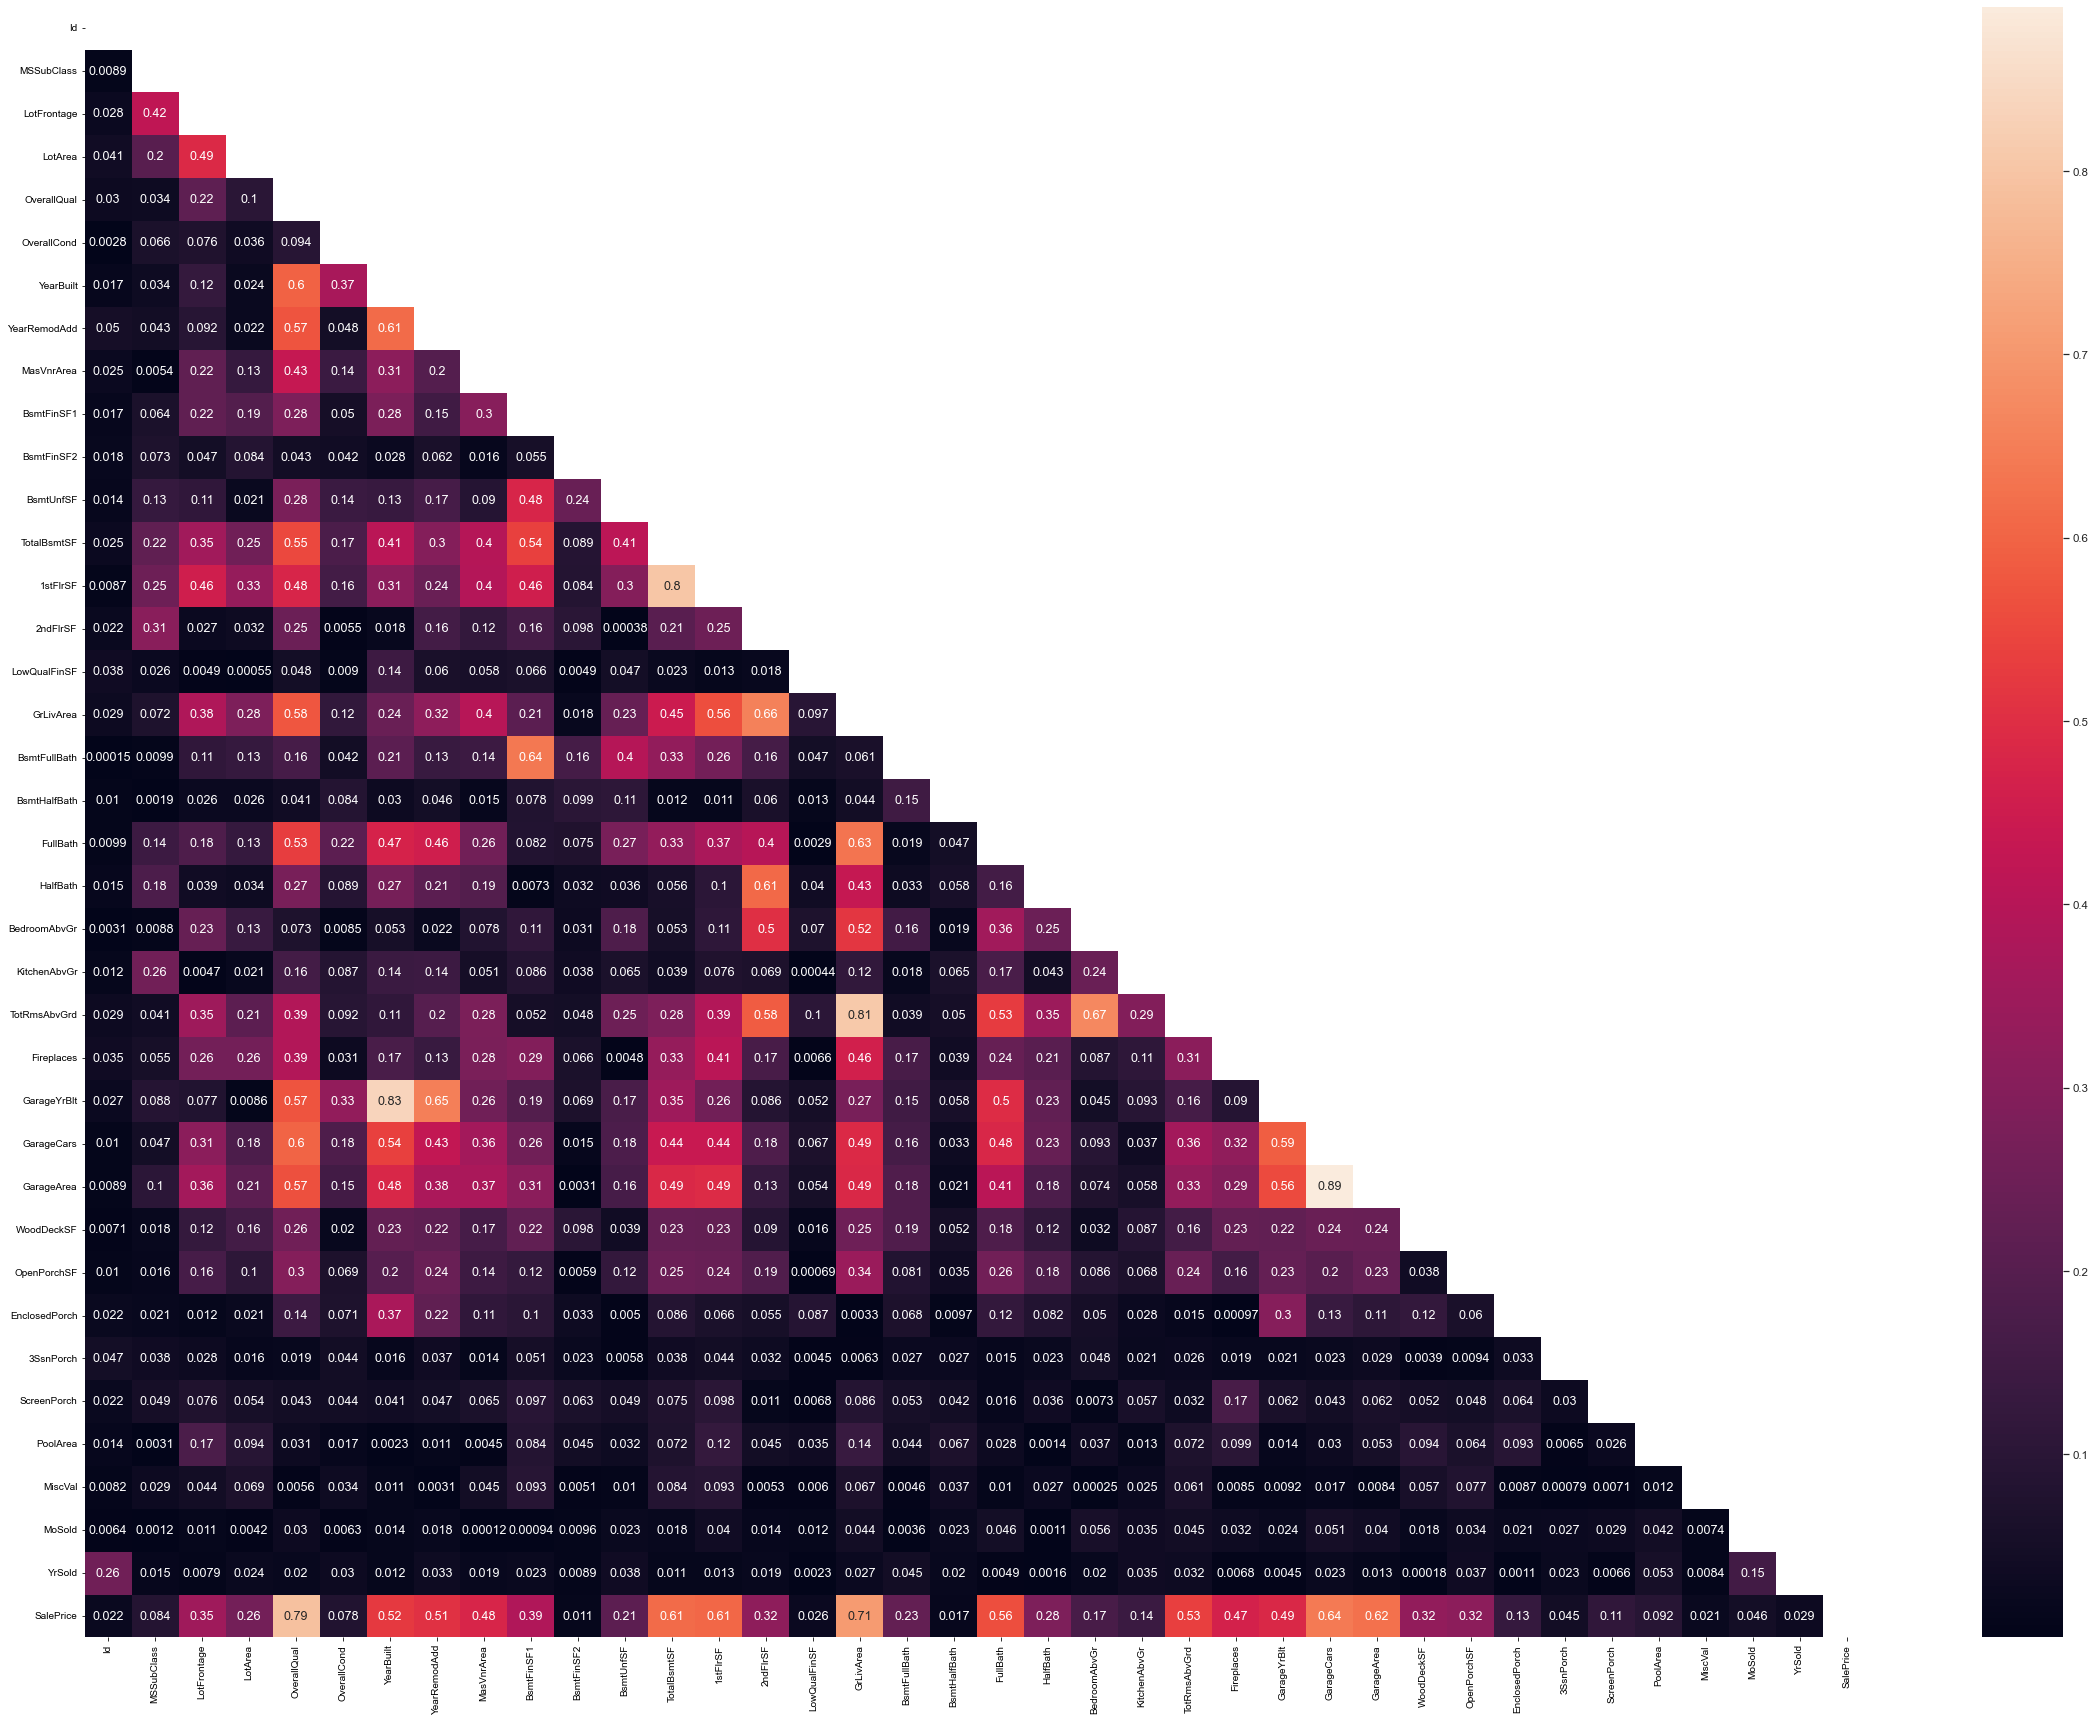

In [13]:
from matplotlib import pyplot as plt
import seaborn as sns

non_dummy_cols = [col for col in list(data.columns) if '_' not in col]
corr_mat = abs(data[non_dummy_cols].corr())
fig,ax = plt.subplots(figsize=(40,30))
sns.set(font_scale=1.05)
sns.heatmap(corr_mat,annot=True,mask=np.triu(corr_mat))
plt.show()

In [14]:
features = ['MSZoning', 'LotArea', 'Street', 'Utilities', 'LotConfig', 'LandSlope',
            'Neighborhood', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'ExterQual',
            'Foundation',  'Electrical', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
            'GarageType', 'GarageCars', 'GarageArea', 'MoSold', 'YrSold',
            'SaleType', 'SaleCondition', 'SalePrice'
            ]

In [15]:
from sklearn.preprocessing import LabelEncoder
new_df0=data[features].copy()
new_df=new_df0.apply(LabelEncoder().fit_transform)
new_df0

MSZoning  LotArea Street Utilities LotConfig LandSlope Neighborhood  \
0          RL     8450   Pave    AllPub    Inside       Gtl      CollgCr   
1          RL     9600   Pave    AllPub       FR2       Gtl      Veenker   
2          RL    11250   Pave    AllPub    Inside       Gtl      CollgCr   
3          RL     9550   Pave    AllPub    Corner       Gtl      Crawfor   
4          RL    14260   Pave    AllPub       FR2       Gtl      NoRidge   
...       ...      ...    ...       ...       ...       ...          ...   
2914       RM     1936   Pave    AllPub    Inside       Gtl      MeadowV   
2915       RM     1894   Pave    AllPub    Inside       Gtl      MeadowV   
2916       RL    20000   Pave    AllPub    Inside       Gtl      Mitchel   
2917       RL    10441   Pave    AllPub    Inside       Gtl      Mitchel   
2918       RL     9627   Pave    AllPub    Inside       Mod      Mitchel   

      YearBuilt  YearRemodAdd RoofStyle  ... BedroomAbvGr KitchenAbvGr  \
0          2003          2003     Gable  ...            3            1   
1          1976          1976     Gable  ...            3            1   
2          2001          2002     Gable  ...            3            1   
3          1915          1970     Gable  ...            3            1   
4          2000          2000     Gable  ...            4            1   
...         ...           ...       ...  ...          ...          ...   
2914       1970          1970     Gable  ...            3            1   
2915       1970          1970     Gable  ...            3            1   
2916       1960          1996     Gable  ...            4            1   
2917       1992          1992     Gable  ...            3            1   
2918       1993          1994     Gable  ...            3            1   

     GarageType GarageCars  GarageArea  MoSold  YrSold  SaleType  \
0        Attchd        2.0       548.0       2    2008        WD   
1        Attchd        2.0       460.0       5    2007        WD   
2        Attchd        2.0       608.0       9    2008        WD   
3        Detchd        3.0       642.0       2    2006        WD   
4        Attchd        3.0       836.0      12    2008        WD   
...         ...        ...         ...     ...     ...       ...   
2914        NaN        0.0         0.0       6    2006        WD   
2915    CarPort        1.0       286.0       4    2006        WD   
2916     Detchd        2.0       576.0       9    2006        WD   
2917        NaN        0.0         0.0       7    2006        WD   
2918     Attchd        3.0       650.0      11    2006        WD   

     SaleCondition  SalePrice  
0           Normal   208500.0  
1           Normal   181500.0  
2           Normal   223500.0  
3          Abnorml   140000.0  
4           Normal   250000.0  
...            ...        ...  
2914        Normal        NaN  
2915       Abnorml        NaN  
2916       Abnorml        NaN  
2917        Normal        NaN  
2918        Normal        NaN  

[2919 rows x 26 columns]

In [19]:
import plotly.express as px

fig = px.parallel_coordinates(new_df0[:100], color="SalePrice", dimensions=['LotArea', 'Street', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'ExterQual', 'Foundation', 'Electrical', 'KitchenAbvGr', 'GarageType', 'GarageCars', 'GarageArea', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice'])
fig.show()

## Data distribution

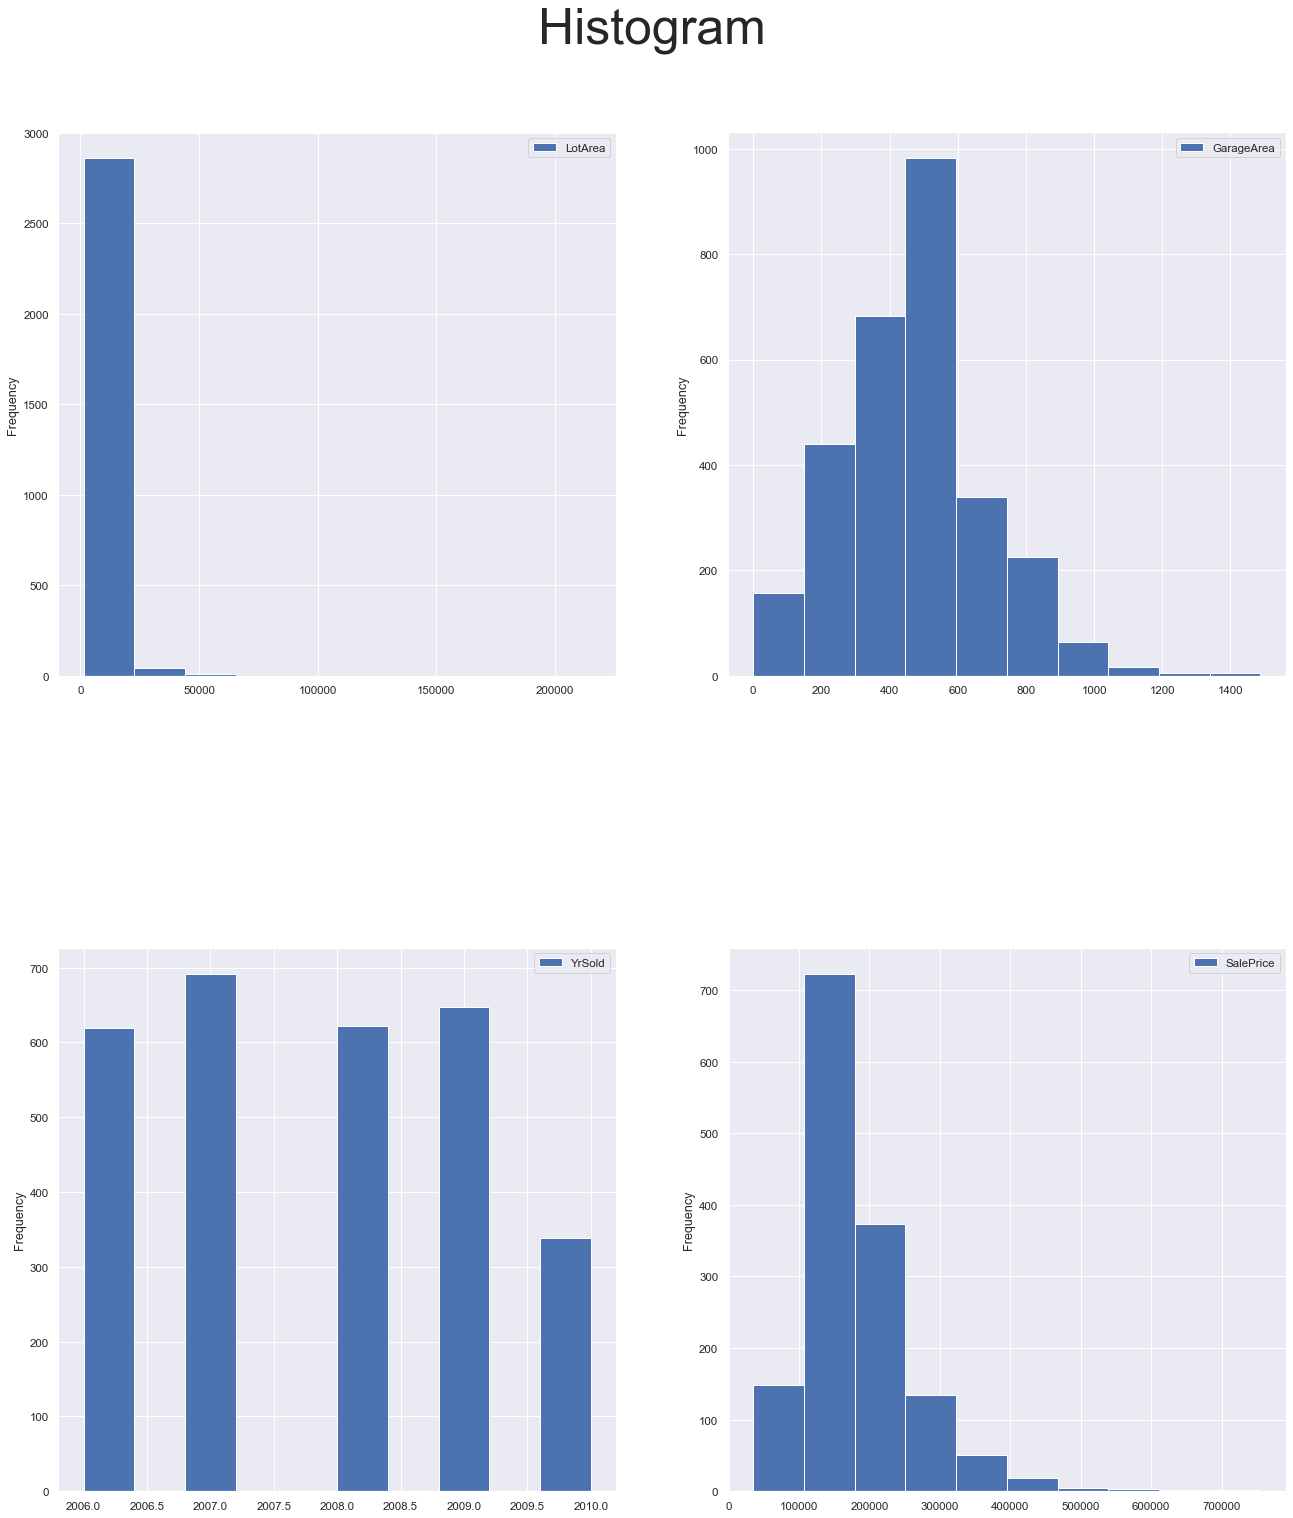

In [20]:
# Target value
select = ['LotArea', 'GarageArea', 'YrSold', 'SalePrice']
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(9, 6))
fig.suptitle("Histogram", fontsize=50, y=0.95)
plt.subplots_adjust(hspace=0.5)
i = 0
for k in select:
    data.plot(y=k, kind='hist', ax=axs.ravel()[i], figsize=(22,25))
    i += 1
plt.show()

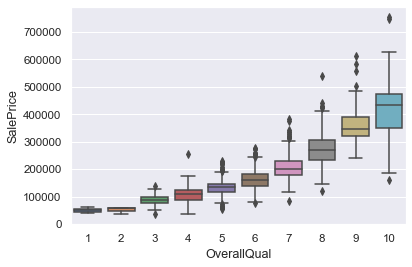

In [21]:
ax = sns.boxplot(x='OverallQual', y='SalePrice', data=data)

/Users/belinda/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



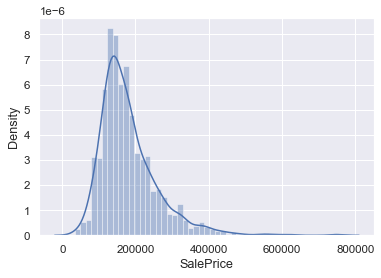

<Figure size 432x288 with 0 Axes>

In [22]:
# Distribution of sale price
sns.distplot(data['SalePrice'])
fig = plt.figure()

/Users/belinda/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

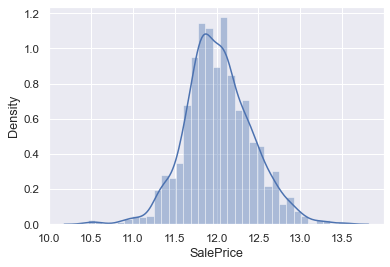

In [23]:
#transformed histogram and normal probability plot
data_sp_log = np.log(data['SalePrice'])
sns.distplot(data_sp_log)

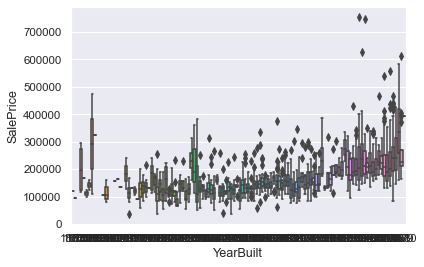

In [24]:
ax = sns.boxplot(x='YearBuilt', y='SalePrice', data=data)

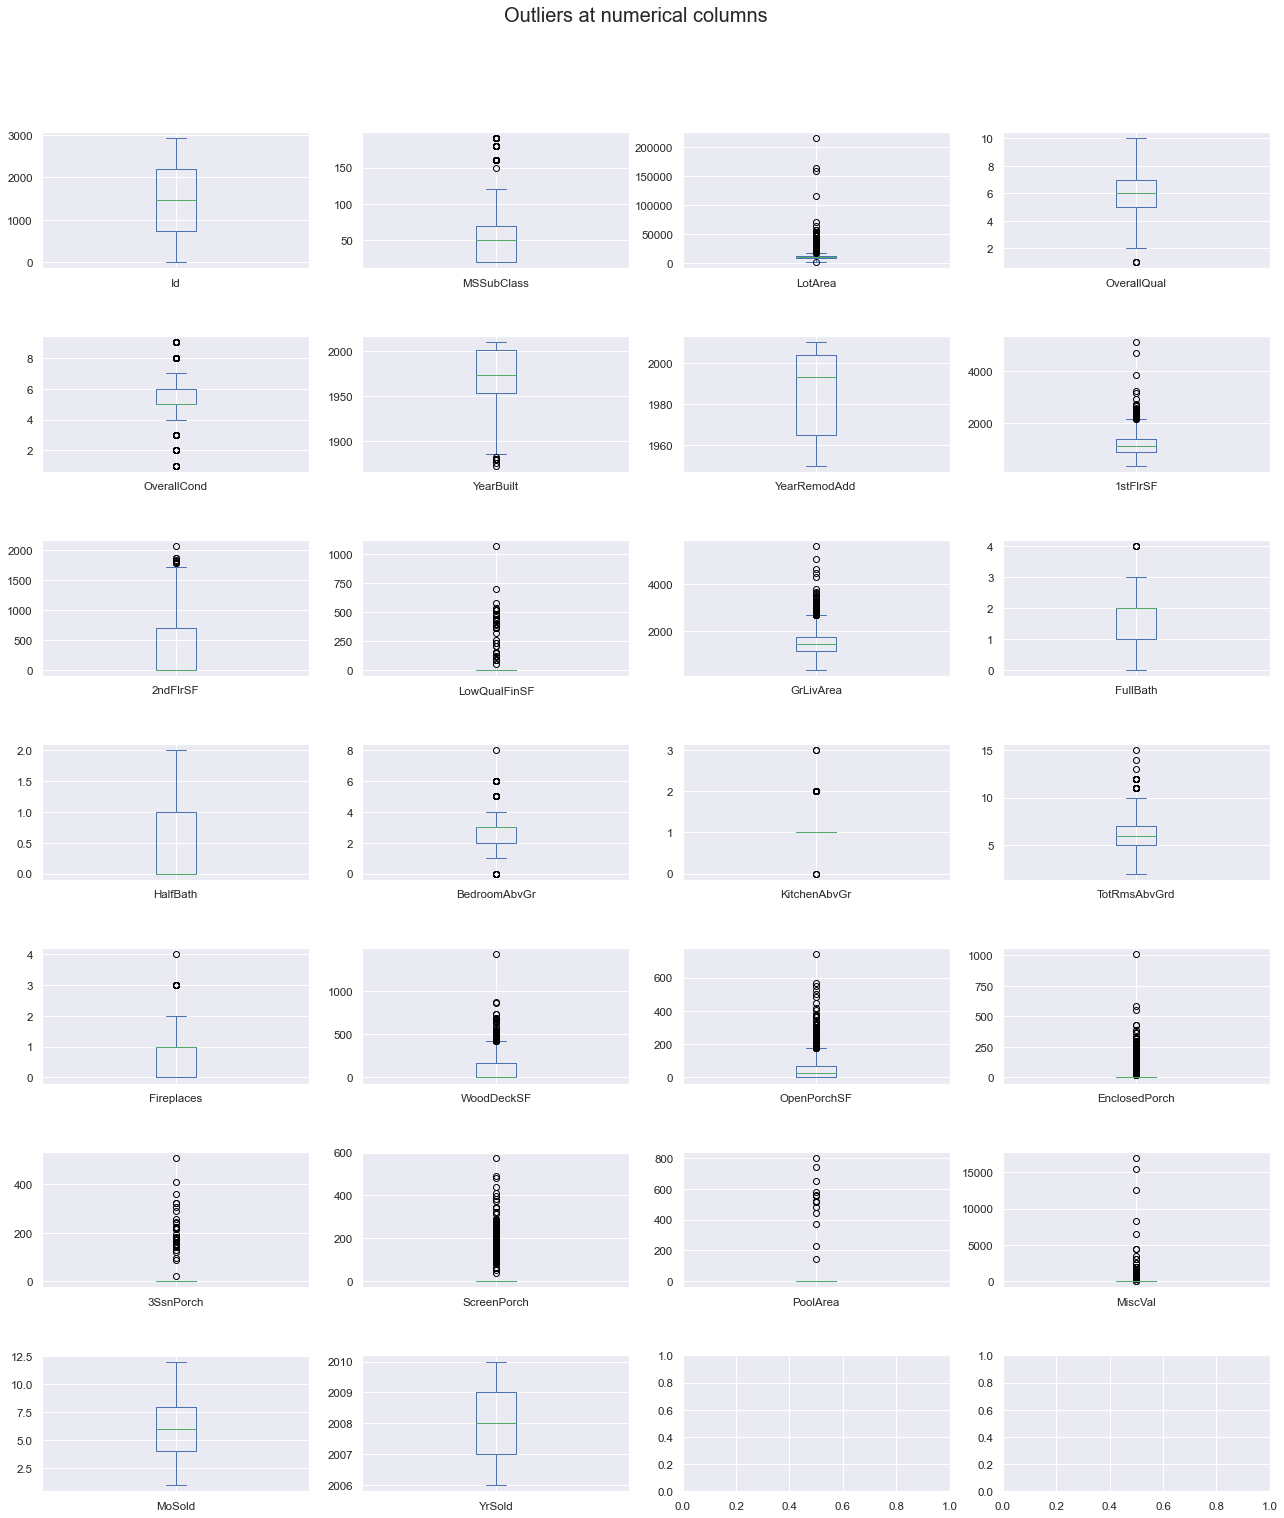

In [25]:
fig, axs = plt.subplots(nrows=7, ncols=4, figsize=(9, 6))
fig.suptitle("Outliers at numerical columns", fontsize=20, y=0.95)
plt.subplots_adjust(hspace=0.5)
i = 0
for k in data.columns:
    if data[k].dtypes == 'int64':
        data.plot(y=k, kind='box', ax=axs.ravel()[i], figsize=(22,25))
        i += 1


plt.show()

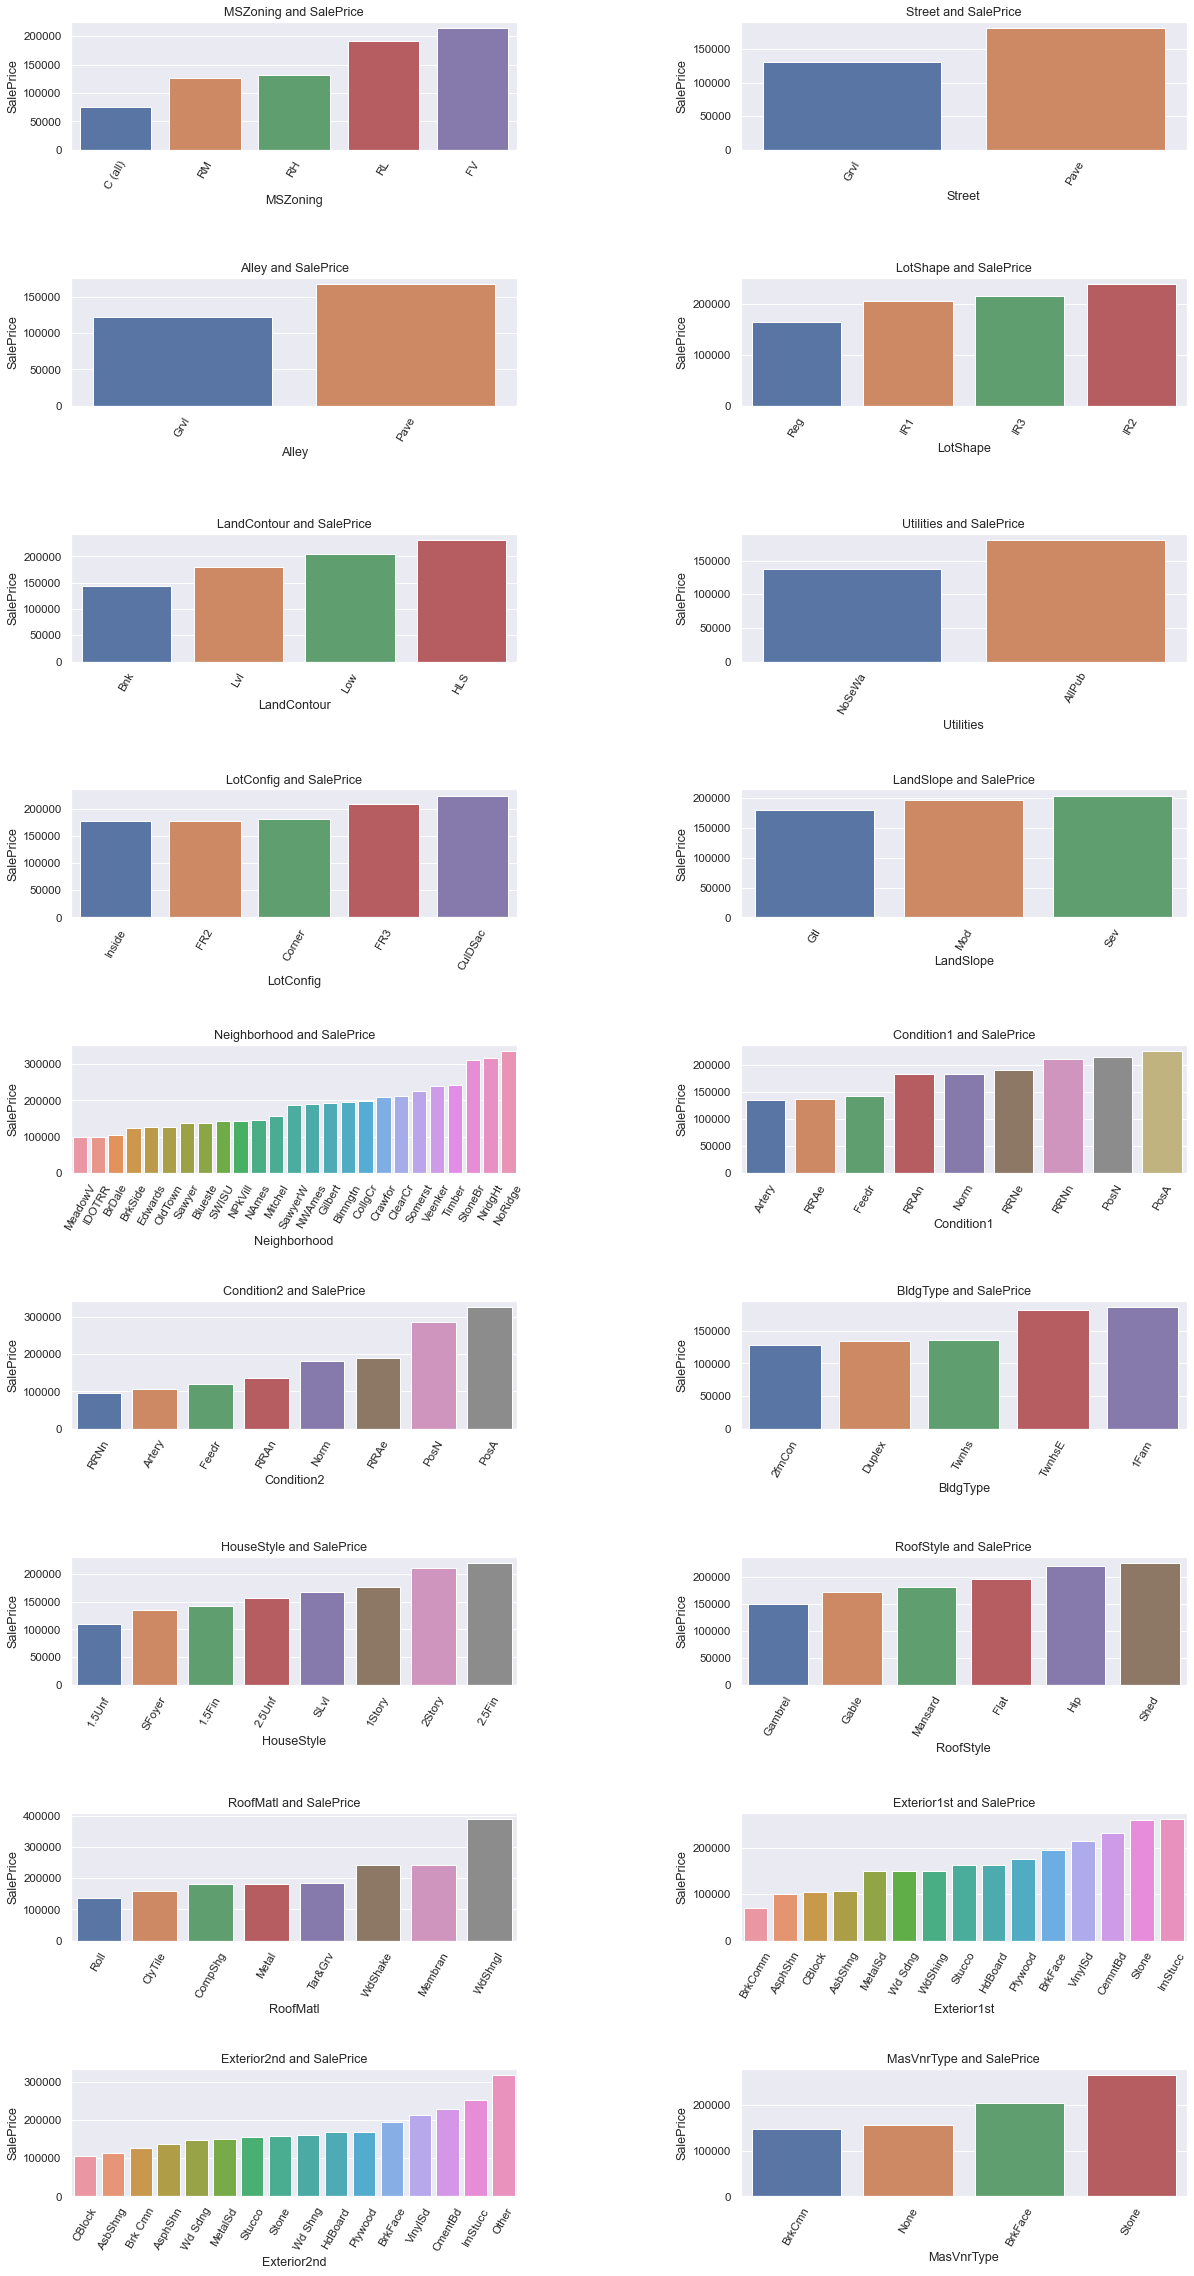

In [26]:
cats = list(data.select_dtypes(exclude=np.number).columns)
def bar_plot(col):
    grouped = data.SalePrice.groupby(data[col]).mean().reset_index()
    sns.barplot(x=grouped[col],y=grouped.SalePrice,order=grouped.sort_values('SalePrice')[col])
    plt.title(col+' and SalePrice')
    plt.xticks(rotation=60)

plt.figure(figsize=(20,40))
plt.subplots_adjust(wspace=0.5,hspace=1)
i=1
for col in cats:
    if i<=18:
        plt.subplot(9,2,i)
        bar_plot(col)
        i+=1

plt.show()

In [27]:
data = pd.read_csv('House Prediction Data.csv')
# Drop where sale price is nan
data = data.dropna(subset=['SalePrice'],axis=0,how='any')
y = data['SalePrice']
y

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 1460, dtype: float64

In [28]:
data = data.drop(['Id','SalePrice'],axis=1)
data

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave   NaN      Reg   
1             20       RL         80.0     9600   Pave   NaN      Reg   
2             60       RL         68.0    11250   Pave   NaN      IR1   
3             70       RL         60.0     9550   Pave   NaN      IR1   
4             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1455          60       RL         62.0     7917   Pave   NaN      Reg   
1456          20       RL         85.0    13175   Pave   NaN      Reg   
1457          70       RL         66.0     9042   Pave   NaN      Reg   
1458          20       RL         68.0     9717   Pave   NaN      Reg   
1459          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC  Fence  \
0            Lvl    AllPub    Inside  ...           0        0    NaN    NaN   
1            Lvl    AllPub       FR2  ...           0        0    NaN    NaN   
2            Lvl    AllPub    Inside  ...           0        0    NaN    NaN   
3            Lvl    AllPub    Corner  ...           0        0    NaN    NaN   
4            Lvl    AllPub       FR2  ...           0        0    NaN    NaN   
...          ...       ...       ...  ...         ...      ...    ...    ...   
1455         Lvl    AllPub    Inside  ...           0        0    NaN    NaN   
1456         Lvl    AllPub    Inside  ...           0        0    NaN  MnPrv   
1457         Lvl    AllPub    Inside  ...           0        0    NaN  GdPrv   
1458         Lvl    AllPub    Inside  ...           0        0    NaN    NaN   
1459         Lvl    AllPub    Inside  ...           0        0    NaN    NaN   

     MiscFeature MiscVal  MoSold  YrSold  SaleType  SaleCondition  
0            NaN       0       2    2008        WD         Normal  
1            NaN       0       5    2007        WD         Normal  
2            NaN       0       9    2008        WD         Normal  
3            NaN       0       2    2006        WD        Abnorml  
4            NaN       0      12    2008        WD         Normal  
...          ...     ...     ...     ...       ...            ...  
1455         NaN       0       8    2007        WD         Normal  
1456         NaN       0       2    2010        WD         Normal  
1457        Shed    2500       5    2010        WD         Normal  
1458         NaN       0       4    2010        WD         Normal  
1459         NaN       0       6    2008        WD         Normal  

[1460 rows x 79 columns]

In [29]:
from sklearn.preprocessing import LabelEncoder
data=data.apply(LabelEncoder().fit_transform)
data

MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0              5         3           36      327       1      2         3   
1              0         3           51      498       1      2         3   
2              5         3           39      702       1      2         0   
3              6         3           31      489       1      2         0   
4              5         3           55      925       1      2         0   
...          ...       ...          ...      ...     ...    ...       ...   
1455           5         3           33      267       1      2         3   
1456           0         3           56      866       1      2         3   
1457           6         3           37      415       1      2         3   
1458           0         3           39      505       1      2         3   
1459           0         3           46      532       1      2         3   

      LandContour  Utilities  LotConfig  ...  ScreenPorch  PoolArea  PoolQC  \
0               3          0          4  ...            0         0       3   
1               3          0          2  ...            0         0       3   
2               3          0          4  ...            0         0       3   
3               3          0          0  ...            0         0       3   
4               3          0          2  ...            0         0       3   
...           ...        ...        ...  ...          ...       ...     ...   
1455            3          0          4  ...            0         0       3   
1456            3          0          4  ...            0         0       3   
1457            3          0          4  ...            0         0       3   
1458            3          0          4  ...            0         0       3   
1459            3          0          4  ...            0         0       3   

      Fence  MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  
0         4            4        0       1       2         8              4  
1         4            4        0       4       1         8              4  
2         4            4        0       8       2         8              4  
3         4            4        0       1       0         8              0  
4         4            4        0      11       2         8              4  
...     ...          ...      ...     ...     ...       ...            ...  
1455      4            4        0       7       1         8              4  
1456      2            4        0       1       4         8              4  
1457      0            2       17       4       4         8              4  
1458      4            4        0       3       4         8              4  
1459      4            4        0       5       2         8              4  

[1460 rows x 79 columns]

## Dataset split

### All dataset

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

X = data

In [31]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.3)

In [32]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [33]:
print('Score on train set for LR:',regressor.score(X_train,y_train))
print('Score on test set for LR:',regressor.score(X_test,y_test))

Score on train set for LR: 0.8729076521830099
Score on test set for LR: 0.7754858467341446


In [34]:
y_pred = regressor.predict(X_test)
print(y_pred)

[ 195654.73767283  157878.94934179   96007.4732156   227197.23495979
   93360.91590325   89344.8512428   250829.15306644  134219.95580223
  381723.97290558  156971.5590397   198820.92579007   -5592.589256
  249431.419752    112779.28142105  129922.28154463  134494.12153918
  239593.55484739  108756.52781235  131579.45428656  174065.96962287
  131634.2677415   152548.02658438   94206.06006298  147410.43337887
  206878.04715838  207736.73739469  165097.41610399   71017.09261337
  369968.46556223  107302.95853383  142915.90582789  219734.59422674
  140783.59079217  291711.63365761  309433.21364725  193116.85961944
  315783.93981551  106517.47175423  231302.1227464   344488.87363359
  190972.06318548  100929.5126226   201781.15637272  297361.35646388
  328209.74610422  133004.07964184  -61174.29760909  110185.0837043
  185298.69806709   95318.62794318  393857.94136915  154659.11307016
  189207.76733146   60528.82823615  242961.19074316   84290.48472097
  113431.02109241  235347.69993376  1

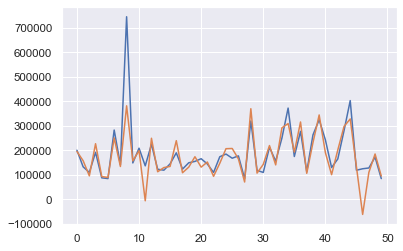

In [35]:
list = [x for x in range(0,50)]
plt.plot(list,y_test[:50],y_pred[:50])

In [36]:
svmr = LinearSVR()
svmr.fit(X_train, y_train)

/Users/belinda/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



LinearSVR()

In [37]:
y_pred = regressor.predict(X_test)
sklearn.metrics.mean_squared_error(y_test,y_pred)


1524224664.8969643

In [38]:
print(y_pred)

[ 195654.73767283  157878.94934179   96007.4732156   227197.23495979
   93360.91590325   89344.8512428   250829.15306644  134219.95580223
  381723.97290558  156971.5590397   198820.92579007   -5592.589256
  249431.419752    112779.28142105  129922.28154463  134494.12153918
  239593.55484739  108756.52781235  131579.45428656  174065.96962287
  131634.2677415   152548.02658438   94206.06006298  147410.43337887
  206878.04715838  207736.73739469  165097.41610399   71017.09261337
  369968.46556223  107302.95853383  142915.90582789  219734.59422674
  140783.59079217  291711.63365761  309433.21364725  193116.85961944
  315783.93981551  106517.47175423  231302.1227464   344488.87363359
  190972.06318548  100929.5126226   201781.15637272  297361.35646388
  328209.74610422  133004.07964184  -61174.29760909  110185.0837043
  185298.69806709   95318.62794318  393857.94136915  154659.11307016
  189207.76733146   60528.82823615  242961.19074316   84290.48472097
  113431.02109241  235347.69993376  1

In [39]:
print('Score on train set for SVMR:',svmr.score(X_train,y_train))
print('Score on test set for SVMR:',svmr.score(X_test,y_test))

Score on train set for SVMR: 0.7447946658051623
Score on test set for SVMR: 0.7014374029478538


In [40]:
y_pred = svmr.predict(X_test)
sklearn.metrics.mean_squared_error(y_test,y_pred)


2026938915.9787278

In [41]:
print(y_pred)

[259686.35247281 123123.96130491 104920.65733396 222078.18673357
  96906.3934852  114497.62801061 254297.75929062 127322.80075557
 316646.21563215 138551.55634241 184323.8271284  194418.04238305
 233556.17792663 114425.70604752 120481.01582272 146437.09114212
 212039.56712641 132624.17416532 144204.50569327 147729.95465661
 137036.04357546 143318.21448597 108387.23990627 151109.09244035
 197209.55406173 164555.9231371  175952.51466954  72101.80370739
 273447.81110406 107791.22990949 194499.59919048 205257.22199928
 134123.76879037 285286.32831627 276801.41049184 182410.24375427
 231964.76700523 111785.55729785 243534.28623303 292674.30667507
 211891.12425684 110000.09248563 171085.82025251 275650.41854963
 318771.87805123 175988.20740697 133365.09501334 120064.95010861
 183370.86066196  89501.83407432 319369.49289164 147029.49841648
 191572.71480196  63443.46907378 236745.98319831 109851.08352964
 122770.27632153 228035.19834492 143942.4726271   75304.48054422
 131451.99084993 123917.4

In [42]:
nusvmr = NuSVR()
nusvmr.fit(X_train, y_train)

NuSVR()

In [43]:
print('Score on train set for NuSVMR:',nusvmr.score(X_train,y_train))
print('Score on test set for NuSVMR:',nusvmr.score(X_test,y_test))

Score on train set for NuSVMR: -0.0091775123347968
Score on test set for NuSVMR: -0.011010525224937728


In [46]:
from xgboost import XGBRegressor

xg_model = XGBRegressor(n_estimators=100)
xg_model.fit(X_train, y_train)
predicted_XGBoost = xg_model.predict(X_test)
print("Mean Absolute Error using XGBoost: ", sklearn.metrics.mean_squared_error(y_test, predicted_XGBoost))

Mean Absolute Error using XGBoost:  821087023.4709258


In [47]:
print('Score on train set for XGBoost:',xg_model.score(X_train,y_train))
print('Score on test set for XGBoost:',xg_model.score(X_test,y_test))

Score on train set for XGBoost: 0.9998672319318662
Score on test set for XGBoost: 0.8790561115577945


In [48]:
y_pred = xg_model.predict(X_test)
print(y_pred)

[178955.67  149198.8   101940.44  246769.44   90365.28  101400.53
 261299.22  122741.71  650460.44  163955.67  220397.8   129616.84
 226055.67  119990.83  126322.01  145934.78  225778.27  113207.234
 134078.05  182883.03  123540.91  145308.56  124232.55  159035.61
 183785.64  148401.23  179925.19   83698.35  336175.12  122179.29
 134213.3   203277.34  138261.45  278519.38  372625.8   171586.
 296222.    122191.484 231018.38  323866.84  247136.1   106364.24
 177691.88  289717.03  378768.22  152165.1   125972.51  119464.48
 170869.02   90309.47  424771.47  149563.1   163693.75   88409.5
 239492.4   102823.54  147412.05  262363.5   134567.23  104320.79
 138228.84  135981.72  132099.36  172044.89  202163.31  168607.38
 141678.05  207753.1   133012.89  193480.25  178100.31  137556.98
  75328.6   234241.75   94899.43  267228.75  132749.27  110358.86
 280492.97  154789.14  126199.71  132554.9   134721.5   145106.84
 184033.23  197969.16  102241.6   187504.86  172253.31  138749.05
 189282.66  

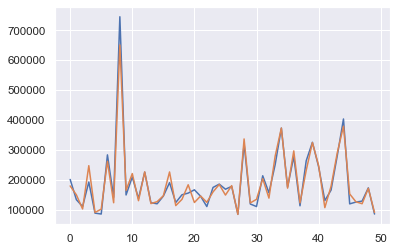

In [49]:
list = [x for x in range(0,50)]
plt.plot(list,y_test[:50],y_pred[:50])

### Picked features

In [50]:
picked_X = data[['GrLivArea','TotalBsmtSF','LotArea','GarageArea','WoodDeckSF','ScreenPorch','PoolArea','MasVnrArea','OpenPorchSF','3SsnPorch']]
picked_y = y

In [51]:
X=picked_X
X_train,X_test,y_train,y_test = train_test_split(picked_X,picked_y,random_state=0,test_size=0.3)

In [52]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [53]:
print('Score on train set for LR:',regressor.score(X_train,y_train))
print('Score on test set for LR:',regressor.score(X_test,y_test))

Score on train set for LR: 0.7044775834536192
Score on test set for LR: 0.6635899444161075


In [54]:
xg_model = XGBRegressor(n_estimators=100)
xg_model.fit(X_train, y_train)
predicted_XGBoost = xg_model.predict(X_test)

In [55]:
print('Score on train set for XGBoost:',xg_model.score(X_train,y_train))
print('Score on test set for XGBoost:',xg_model.score(X_test,y_test))

Score on train set for XGBoost: 0.9978193986597614
Score on test set for XGBoost: 0.6745620992505277


In [72]:
describe_data = data[['GrLivArea','TotalBsmtSF','LotArea','GarageArea','WoodDeckSF','ScreenPorch','PoolArea','MasVnrArea','OpenPorchSF','3SsnPorch']]
describe_data

GrLivArea  TotalBsmtSF  LotArea  GarageArea  WoodDeckSF  ScreenPorch  \
0           531          179      327         220           0            0   
1           259          441      498         149         187            0   
2           570          214      702         260           0            0   
3           536          117      489         284           0            0   
4           734          370      925         380         118            0   
...         ...          ...      ...         ...         ...          ...   
1455        489          238      267         149           0            0   
1456        694          577      866         182         214            0   
1457        767          375      415          24           0            0   
1458        147          325      505          19         224            0   
1459        256          436      532          35         272            0   

      PoolArea  MasVnrArea  OpenPorchSF  3SsnPorch  
0            0         128           49          0  
1            0           0            0          0  
2            0         104           30          0  
3            0           0           24          0  
4            0         221           70          0  
...        ...         ...          ...        ...  
1455         0           0           28          0  
1456         0          72            0          0  
1457         0           0           48          0  
1458         0           0            0          0  
1459         0           0           56          0  

[1460 rows x 10 columns]

In [78]:
describe_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   GrLivArea    1460 non-null   int64
 1   TotalBsmtSF  1460 non-null   int64
 2   LotArea      1460 non-null   int64
 3   GarageArea   1460 non-null   int64
 4   WoodDeckSF   1460 non-null   int64
 5   ScreenPorch  1460 non-null   int64
 6   PoolArea     1460 non-null   int64
 7   MasVnrArea   1460 non-null   int64
 8   OpenPorchSF  1460 non-null   int64
 9   3SsnPorch    1460 non-null   int64
dtypes: int64(10)
memory usage: 125.5 KB


In [73]:
describe_data.describe()

GrLivArea  TotalBsmtSF      LotArea   GarageArea   WoodDeckSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean    384.765068   301.450685   492.102740   168.356164    53.979452   
std     235.191277   198.433463   300.719399   116.385974    72.089748   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%     180.750000   139.750000   229.750000    69.750000     0.000000   
50%     371.000000   269.500000   476.500000   166.000000     0.000000   
75%     567.250000   462.250000   737.250000   240.000000    97.000000   
max     860.000000   720.000000  1072.000000   440.000000   273.000000   

       ScreenPorch     PoolArea   MasVnrArea  OpenPorchSF    3SsnPorch  
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  
mean      2.873973     0.019178    59.663699    35.636986     0.158904  
std      11.273071     0.309173    91.506274    47.892383     1.388076  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000    15.000000     0.000000  
75%       0.000000     0.000000   110.000000    56.000000     0.000000  
max      75.000000     7.000000   327.000000   201.000000    19.000000

Simple UI

In [79]:
import PySimpleGUI as sg
sg.theme('SandyBeach')     
layout = [
    [sg.Text('Please enter your information')],
    [sg.Text('GrLivArea', size =(15, 1)), sg.InputText()],
    [sg.Text('TotalBsmtSF', size =(15, 1)), sg.InputText()],
    [sg.Text('LotArea', size =(15, 1)), sg.InputText()],
    [sg.Text('GarageArea', size =(15, 1)), sg.InputText()],
    [sg.Text('WoodDeckSF', size =(15, 1)), sg.InputText()],
    [sg.Text('ScreenPorch', size =(15, 1)), sg.InputText()],
    [sg.Text('PoolArea', size =(15, 1)), sg.InputText()],
    [sg.Text('MasVnrArea', size =(15, 1)), sg.InputText()],
    [sg.Text('OpenPorchSF', size =(15, 1)), sg.InputText()],
    [sg.Text('3SsnPorch', size =(15, 1)), sg.InputText()],
    [sg.Submit(), sg.Cancel()]
]
#data[['GrLivArea','TotalBsmtSF','LotArea','GarageArea','WoodDeckSF','ScreenPorch','PoolArea','MasVnrArea','OpenPorchSF','3SsnPorch']]
window = sg.Window('Simple UI window', layout)
event, values = window.read()
window.close()
print(event, values[0], values[1], values[2], values[3], values[4], values[5], values[6], values[7], values[8], values[9])


Submit 390 720 300 170 54 0 0 100 200 0


In [101]:
User = pd.DataFrame([{'GrLivArea': values[0] , 'TotalBsmtSF': values[1], 'LotArea': values[2], 
                      'GarageArea': values[3],'WoodDeckSF': values[4], 'ScreenPorch': values[5], 
                      'PoolArea': values[6], 'MasVnrArea': values[7], 'OpenPorchSF': values[8], 
                      '3SsnPorch': values[9]}])
User

GrLivArea TotalBsmtSF LotArea GarageArea WoodDeckSF ScreenPorch PoolArea  \
0       390         720     300        170         54           0        0   

  MasVnrArea OpenPorchSF 3SsnPorch  
0        100         200         0

In [102]:
User[['GrLivArea','TotalBsmtSF','LotArea',
      'GarageArea','WoodDeckSF','ScreenPorch',
      'PoolArea','MasVnrArea','OpenPorchSF',
      '3SsnPorch']] = User[['GrLivArea','TotalBsmtSF','LotArea',
                            'GarageArea','WoodDeckSF','ScreenPorch',
                            'PoolArea','MasVnrArea','OpenPorchSF',
                            '3SsnPorch']].apply(pd.to_numeric)
User

GrLivArea  TotalBsmtSF  LotArea  GarageArea  WoodDeckSF  ScreenPorch  \
0        390          720      300         170          54            0   

   PoolArea  MasVnrArea  OpenPorchSF  3SsnPorch  
0         0         100          200          0

In [103]:
UserPred_linear = regressor.predict(User)
UserPred_linear

array([242537.73264568])

In [104]:
UserPred_XGBoost = xg_model.predict(User)
UserPred_XGBoost

array([229946.44], dtype=float32)